In [1]:
from udntools.region import CompServiceRegion
import matplotlib.pyplot as plt
import numpy as np
from udntools.utils import cdf_y_axis

In [2]:
comp_service_region = CompServiceRegion(0, 100, 0, 100,
                                        100, 10000,
                                        ue_sigma=5)

In [3]:
def get_comp_number(region):
    count = 0
    for key, values in region.cluster_set_.items():
        num = np.size(values)
        if num > 1:
            count += num
        # count = count if count > num else num
    return count

In [4]:
# 设定仿真的信干比区间
x_axis = np.arange(-10, 20.5, 1)


comp_service_region.cluster_by_dfs(0)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_0 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
a = get_comp_number(comp_service_region)

comp_service_region.cluster_by_dfs(3)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_3 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
b = get_comp_number(comp_service_region)

comp_service_region.cluster_by_dfs(5)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_5 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
c = get_comp_number(comp_service_region)

comp_service_region.cluster_by_dfs(7)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_7 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
d = get_comp_number(comp_service_region)

comp_service_region.cluster_by_dfs(8)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_10 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
e = get_comp_number(comp_service_region)

In [5]:
comp_service_region.cluster_by_dfs(0)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_0 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
f = get_comp_number(comp_service_region)

comp_service_region.cluster_by_kmeans(40)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_30 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
g = get_comp_number(comp_service_region)

comp_service_region.cluster_by_kmeans(60)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_50 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
h = get_comp_number(comp_service_region)

comp_service_region.cluster_by_kmeans(80)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_70 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
i = get_comp_number(comp_service_region)

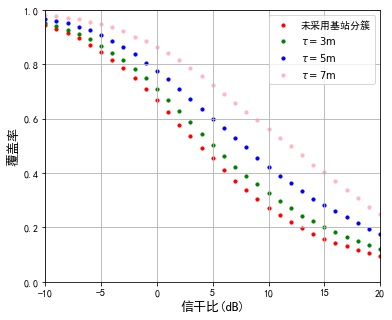

In [6]:
fig = plt.figure(figsize=(6, 5))
# 使能中文字体

# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

f0 = plt.scatter(x_axis, 1 - cdf_dfs_0, s = 10, c='r')
f3 = plt.scatter(x_axis, 1 - cdf_dfs_3, s = 10, c='g')
f5 = plt.scatter(x_axis, 1 - cdf_dfs_5, s = 10, c='b')
f7 = plt.scatter(x_axis, 1 - cdf_dfs_7, s = 10, c='lightpink')
plt.xlim(-10, 20)
plt.ylim(0,1)
plt.grid(True)

# 加图例
plt.legend(handles=[f0,
                    f3,
                    f5,
                    f7], 
           labels=[r"未采用基站分簇",
                   r"$\tau=3\mathrm{m}$",
                   r"$\tau=5\mathrm{m}$",
                   r"$\tau=7\mathrm{m}$"], 
           loc='best',
           prop={'size': 10})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=13)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=13)

# 存储成pdf
fig.savefig('pc_dfs_zfbf_show.pdf')
fig.savefig('pc_dfs_zfbf_show.png')

plt.show()

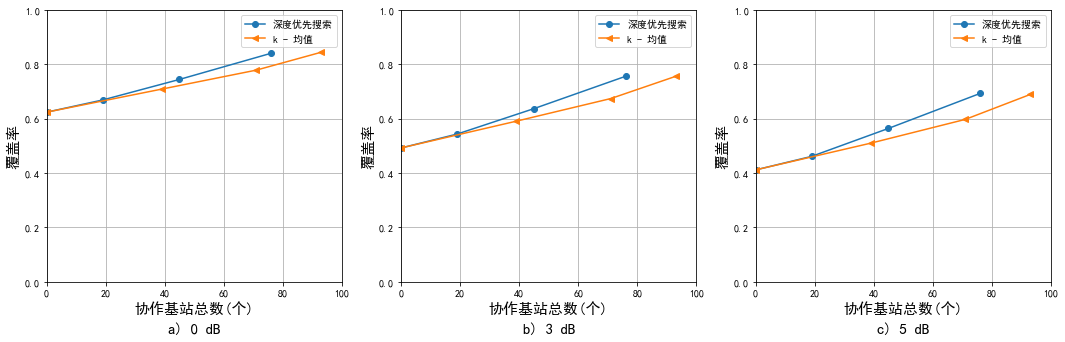

In [11]:
# 图片大小
fig = plt.figure(figsize=(18, 5))
# 使能中文字体
# -*- coding:utf-8 -*-
plt.subplot(131)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x, = plt.plot([a, b, c, d], [1 - cdf_dfs_0[11], 1 - cdf_dfs_3[11], 1 - cdf_dfs_5[11], 1 - cdf_dfs_7[11]], marker='o')
y, = plt.plot([g, h, i, a], [1 - cdf_dfs_30[11], 1 - cdf_dfs_50[11],1 - cdf_dfs_70[11], 1 - cdf_dfs_0[11]], marker='<')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.grid(True)
# 加坐标轴标签
plt.xlabel("协作基站总数(个)",fontproperties = 'SimHei', fontsize=15)
plt.ylabel("覆盖率",fontproperties = 'SimHei', fontsize=15)
plt.title("a) 0 dB",fontproperties = 'SimHei', size=15, x=0.5, y=-0.21)
plt.legend(handles=[x,
                    y], 
           labels=["深度优先搜索",
                   "k - 均值"], 
           loc='best',
           prop={'size': 10})

plt.subplot(132)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x, = plt.plot([a, b, c, d], [1 - cdf_dfs_0[14], 1 - cdf_dfs_3[14], 1 - cdf_dfs_5[14], 1 - cdf_dfs_7[14]], marker='o')
y, = plt.plot([g, h, i, a], [1 - cdf_dfs_30[14], 1 - cdf_dfs_50[14],1 - cdf_dfs_70[14], 1 - cdf_dfs_0[14]], marker='<')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.grid(True)
# 加坐标轴标签
plt.xlabel("协作基站总数(个)",fontproperties = 'SimHei', fontsize=15)
plt.ylabel("覆盖率",fontproperties = 'SimHei', fontsize=15)
plt.title("b) 3 dB",fontproperties = 'SimHei', size=15, x=0.5, y=-0.21)
plt.legend(handles=[x,
                    y], 
           labels=["深度优先搜索",
                   "k - 均值"], 
           loc='best',
           prop={'size': 10})

plt.subplot(133)

x, = plt.plot([a, b, c, d], [1 - cdf_dfs_0[16], 1 - cdf_dfs_3[16], 1 - cdf_dfs_5[16], 1 - cdf_dfs_7[16]], marker='o')
y, = plt.plot([g, h, i, a], [1 - cdf_dfs_30[16], 1 - cdf_dfs_50[16],1 - cdf_dfs_70[16], 1 - cdf_dfs_0[16]], marker='<')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.grid(True)
# 加坐标轴标签
plt.xlabel("协作基站总数(个)",fontproperties = 'SimHei', fontsize=15)
plt.ylabel("覆盖率",fontproperties = 'SimHei', fontsize=15)
plt.title("c) 5 dB",fontproperties = 'SimHei', size=15, x=0.5, y=-0.21)
plt.legend(handles=[x,
                    y], 
           labels=["深度优先搜索",
                   "k - 均值"], 
           loc='best',
           prop={'size': 10})

fig.savefig('kmeans_network_show.pdf')
fig.savefig('kmeans_network_show.png')
plt.show()